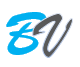

In [59]:
#Not to be distributed without granted permission
from IPython.display import display, Image
display(Image(filename='logo.png'))

In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt

%matplotlib inline

df_vg = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv', dtype=object)

In [61]:
df_vg.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df_vg.sample(n=5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2887,NBA Live 09,X360,2008,Sports,Electronic Arts,0.5,0.14,0,0.07,0.71,77,32,7.4,14,EA Canada,E
2418,Winning Eleven: Pro Evolution Soccer 2007,PSP,2006,Sports,Konami Digital Entertainment,0.01,0.72,0.12,0.01,0.86,81,10,8.3,14,KCET,E
8783,NHL 2K10,PS3,2009,Sports,Take-Two Interactive,0.13,0.01,0,0.01,0.15,66,23,7.1,8,Take-Two Interactive,E10+
2307,Madden NFL 25,PS4,2013,Sports,Electronic Arts,0.63,0.13,0,0.15,0.9,74,13,5.2,118,EA Sports,E
4963,Shin Megami Tensei: Nocturne,PS2,2003,Role-Playing,Ghostlight,0.07,0.05,0.25,0.02,0.38,82,42,8.7,83,Atlus Co.,M


In [63]:
df_vg.dropna(how='any', inplace=True) 
df_vg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null object
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null object
EU_Sales           6825 non-null object
JP_Sales           6825 non-null object
Other_Sales        6825 non-null object
Global_Sales       6825 non-null object
Critic_Score       6825 non-null object
Critic_Count       6825 non-null object
User_Score         6825 non-null object
User_Count         6825 non-null object
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: object(16)
memory usage: 906.4+ KB


In [64]:
df_vg.Genre = pd.Categorical(df_vg.Genre)
df_vg['Genre'] = df_vg.Genre.cat.codes

df_vg["Critic_Score"] = pd.to_numeric(df_vg["Critic_Score"])

df_vg = df_vg[df_vg.User_Score != 'tbd']
df_vg["User_Score"] = pd.to_numeric(df_vg["User_Score"])

df_vg["Global_Sales"] = pd.to_numeric(df_vg["Global_Sales"])

df_vg.Platform = pd.Categorical(df_vg.Platform)
df_vg['Platform'] = df_vg.Platform.cat.codes

df_vg.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,12,2006,10,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E
2,Mario Kart Wii,12,2008,6,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,12,2009,10,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
6,New Super Mario Bros.,2,2006,4,Nintendo,11.28,9.14,6.5,2.88,29.80,89,65,8.5,431,Nintendo,E
7,Wii Play,12,2006,3,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,Nintendo,E


In [65]:
df_vg = df_vg[['Genre','Global_Sales','Critic_Score','Platform','User_Score']]
df_vg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 5 columns):
Genre           6825 non-null int8
Global_Sales    6825 non-null float64
Critic_Score    6825 non-null int64
Platform        6825 non-null int8
User_Score      6825 non-null float64
dtypes: float64(2), int64(1), int8(2)
memory usage: 226.6 KB


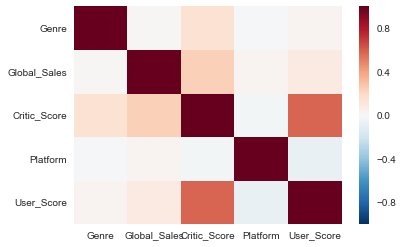

In [66]:
sns.heatmap(df_vg.corr())

In [67]:
df_vg.describe()

,Genre,Global_Sales,Critic_Score,Platform,User_Score
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,5.095971,0.777590,70.272088,8.588571,7.185626
std,3.811582,1.963443,13.868572,4.289097,1.439942
min,0.000000,0.010000,13.000000,0.000000,0.500000
25%,1.000000,0.110000,62.000000,5.000000,6.500000
50%,6.000000,0.290000,72.000000,8.000000,7.500000
75%,8.000000,0.750000,80.000000,12.000000,8.200000
max,11.000000,82.530000,98.000000,16.000000,9.600000


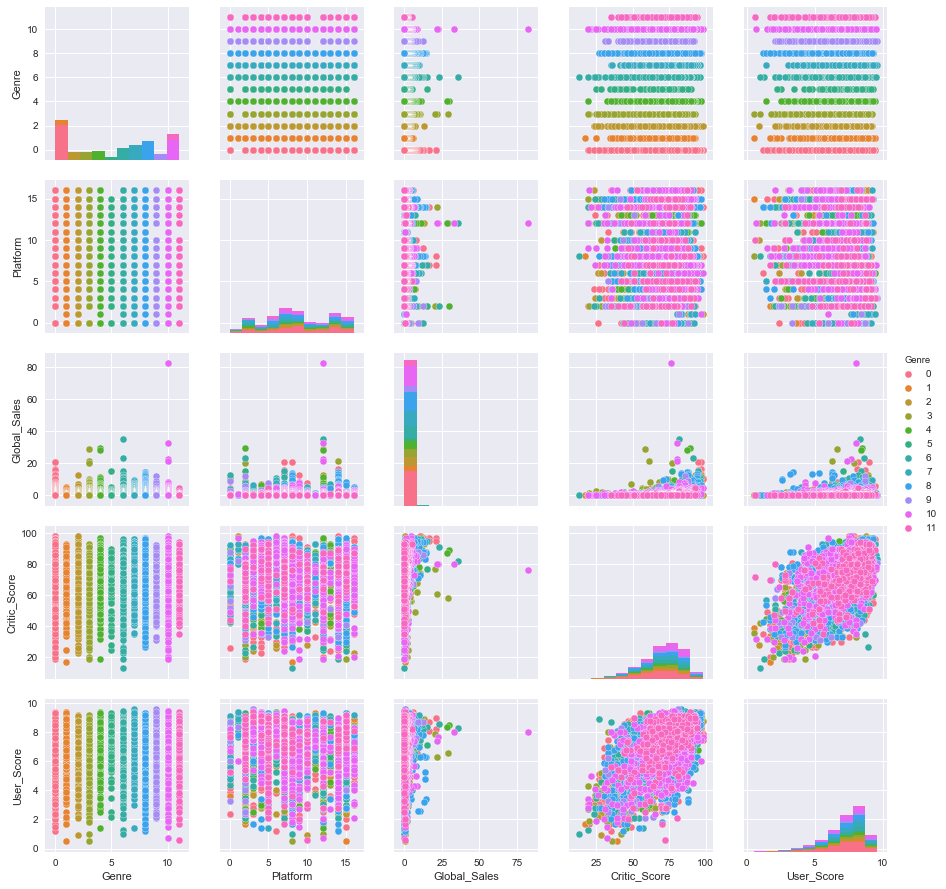

In [68]:
# simple visualization to show how the inputs compare against each other
sns.pairplot( data=df_vg, vars=('Genre','Platform','Global_Sales','Critic_Score','User_Score'), hue='Genre' )

In [69]:
df_norm = df_vg[['Genre', 'Platform', 'Global_Sales', 'Critic_Score', 'User_Score']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

,Genre,Platform,Global_Sales,Critic_Score,User_Score
5849,0.181818,1.000,0.003514,0.800000,0.879121
9109,0.909091,0.750,0.001575,0.482353,0.758242
4727,0.363636,0.750,0.004847,0.658824,0.879121
3725,0.181818,0.875,0.006423,0.494118,0.582418
11314,0.636364,0.125,0.000848,0.741176,0.890110


In [70]:
df_norm.describe()

,Genre,Platform,Global_Sales,Critic_Score,User_Score
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,0.463270,0.536786,0.009302,0.673789,0.734684
std,0.346507,0.268069,0.023794,0.163160,0.158235
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.312500,0.001212,0.576471,0.659341
50%,0.545455,0.500000,0.003393,0.694118,0.769231
75%,0.727273,0.750000,0.008968,0.788235,0.846154
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_norm[['Genre','Platform','Global_Sales','Critic_Score']], df_norm['User_Score'], test_size=0.33, random_state=42)

In [72]:
print("X Train: Training data set")
print(X_train)

print("X Test: Test data set")
print(X_test)

print("Y Train: Labels to data in training data set")
print(y_train)

print("Y Test: Labels to data in test data set")
print(y_test)

X Train: Training data set
          Genre  Platform  Global_Sales  Critic_Score
1953   0.636364    0.3125      0.012724      0.870588
6484   0.000000    0.8750      0.003030      0.588235
15441  0.000000    0.3125      0.000121      0.458824
3014   0.000000    0.8750      0.007998      0.800000
12729  0.909091    0.5625      0.000606      0.341176
6595   0.090909    0.2500      0.002908      0.800000
11614  0.272727    0.8750      0.000848      0.717647
1676   0.545455    0.5000      0.014421      0.811765
1104   0.909091    0.4375      0.019995      0.823529
2371   0.000000    0.3125      0.010543      0.905882
1027   0.909091    0.4375      0.020843      0.929412
11080  0.727273    0.8750      0.000969      0.282353
10893  0.727273    0.4375      0.000969      0.811765
1405   0.363636    0.8750      0.016602      0.752941
11191  0.181818    0.8750      0.000969      0.682353
4424   0.000000    0.7500      0.005211      0.658824
14714  0.090909    0.9375      0.000242      0.682353
8

In [73]:
from keras.models import Sequential
from keras.layers import Dense

#create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [74]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
from keras.callbacks import EarlyStopping

#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

#train model
model.fit(X_train, y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

Train on 3657 samples, validate on 915 samples
Epoch 1/30
3657/3657 [==============================] - 0s 116us/step - loss: 0.5567 - val_loss: 0.3161
Epoch 2/30
3657/3657 [==============================] - 0s 26us/step - loss: 0.1345 - val_loss: 0.0371
Epoch 3/30
3657/3657 [==============================] - 0s 26us/step - loss: 0.0282 - val_loss: 0.0221
Epoch 4/30
3657/3657 [==============================] - 0s 26us/step - loss: 0.0200 - val_loss: 0.0186
Epoch 5/30
3657/3657 [==============================] - 0s 26us/step - loss: 0.0180 - val_loss: 0.0176
Epoch 6/30
3657/3657 [==============================] - 0s 26us/step - loss: 0.0173 - val_loss: 0.0170
Epoch 7/30
3657/3657 [==============================] - 0s 26us/step - loss: 0.0170 - val_loss: 0.0171
Epoch 8/30
3657/3657 [==============================] - 0s 26us/step - loss: 0.0170 - val_loss: 0.0168
Epoch 9/30
3657/3657 [==============================] - 0s 26us/step - loss: 0.0168 - val_loss: 0.0171
Epoch 10/30
3657/3657 [==

In [76]:
#example on how to use our newly trained model on how to make predictions on unseen data (we will pretend our new data is saved in a dataframe called 'test_X').
test_y_predictions = model.predict(X_test)

print(test_y_predictions,y_test)

[[ 0.88536358]
 [ 0.76158035]
 [ 0.81798124]
 ..., 
 [ 0.59833574]
 [ 0.85945141]
 [ 0.81102955]] 146      0.978022
4427     0.824176
6970     0.912088
3885     0.791209
11023    0.439560
2258     0.725275
3724     0.868132
14273    0.879121
11965    0.890110
10799    0.791209
2135     0.945055
849      0.648352
7062     0.725275
3980     0.648352
10946    0.362637
6454     0.692308
16196    0.747253
14093    0.824176
6894     0.791209
13144    0.857143
5001     0.901099
1753     0.582418
649      0.692308
8127     0.857143
13560    0.417582
9864     0.791209
11767    0.934066
1452     0.747253
10725    0.593407
11481    0.285714
           ...   
3799     0.538462
10338    0.659341
7563     0.736264
4270     0.945055
1002     0.846154
1215     0.824176
3642     0.868132
7617     0.725275
2145     0.769231
9775     0.824176
8824     0.802198
6176     0.769231
13842    0.714286
12685    0.835165
13424    0.692308
8225     0.384615
10369    0.615385
12545    0.835165
12231    0.780220
28

In [82]:
#training a new model on the same data to show the effect of increasing model capacity

#create model
model_mc = Sequential()

#add model layers
model_mc.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(100, activation='relu'))
model_mc.add(Dense(100, activation='relu'))
model_mc.add(Dense(1))

#compile model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error')
#train model
model_mc.fit(X_train, y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

model_mc.evaluate(X_test, y_test)

score = model_mc.evaluate(X_test, y_test, verbose=0)
print('Loss: ', score)

Train on 3657 samples, validate on 915 samples
Epoch 1/30
3657/3657 [==============================] - 1s 162us/step - loss: 0.0380 - val_loss: 0.0177
Epoch 2/30
3657/3657 [==============================] - 0s 37us/step - loss: 0.0172 - val_loss: 0.0170
Epoch 3/30
3657/3657 [==============================] - 0s 38us/step - loss: 0.0168 - val_loss: 0.0169
Epoch 4/30
3657/3657 [==============================] - 0s 38us/step - loss: 0.0169 - val_loss: 0.0174
Epoch 5/30
3657/3657 [==============================] - 0s 37us/step - loss: 0.0168 - val_loss: 0.0169
Epoch 6/30
3657/3657 [==============================] - 0s 38us/step - loss: 0.0166 - val_loss: 0.0166
Epoch 7/30
3657/3657 [==============================] - 0s 37us/step - loss: 0.0166 - val_loss: 0.0170
Epoch 8/30
3657/3657 [==============================] - 0s 37us/step - loss: 0.0167 - val_loss: 0.0171
Epoch 9/30
3657/3657 [==============================] - 0s 37us/step - loss: 0.0164 - val_loss: 0.0165
Epoch 10/30
3657/3657 [==

	Genre	Platform	Global_Sales	Critic_Score	User_Score
5849	0.181818	1.000	0.003514	0.800000	0.879121
9109	0.909091	0.750	0.001575	0.482353	0.758242
4727	0.363636	0.750	0.004847	0.658824	0.879121
3725	0.181818	0.875	0.006423	0.494118	0.582418
11314	0.636364	0.125	0.000848	0.741176	0.890110

In [84]:
df = pd.DataFrame(columns=list('ABCD'))

arrZZ1 = [0.909091,0.5000,0.007635,0.835294]
arrZZ2 = [0.727273,0.2500,0.000242,0.270588]
arrZZ3 = [0.909091,0.2500,0.002666,0.905882]
arrZZ4 = [0.181818,0.2500,0.000727,0.364706]
arrZZ5 = [0.909091,0.9375,0.007029,0.905882]

df.loc[0] = arrZZ1
df.loc[1] = arrZZ2
df.loc[2] = arrZZ3
df.loc[3] = arrZZ4
df.loc[4] = arrZZ5

#0.734333
model_mc.predict(df)

array([[ 0.78469163],
       [ 0.42934871],
       [ 0.8328346 ],
       [ 0.58951682],
       [ 0.81224632]], dtype=float32)

In [85]:
import tensorflow as tf
#mnist = tf.keras.datasets.mnist

#(x_train, y_train),(x_test, y_test) = mnist.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0

X_train2 = X_train.values 
y_train2 = y_train.values 
X_test2 = X_test.values
y_test2 = y_test.values


model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.relu)
])

model.compile(optimizer='adam',
              loss='mean_squared_error')

model.fit(X_train2, y_train2, validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])
model.evaluate(X_test2, y_test2)

score = model.evaluate(X_test2, y_test2, verbose=0)
print('Loss: ', score)

Train on 3657 samples, validate on 915 samples
Epoch 1/10
3657/3657 [==============================] - 1s 164us/step - loss: 0.0816 - val_loss: 0.0173
Epoch 2/10
3657/3657 [==============================] - 0s 29us/step - loss: 0.0171 - val_loss: 0.0170
Epoch 3/10
3657/3657 [==============================] - 0s 29us/step - loss: 0.0169 - val_loss: 0.0170
Epoch 4/10
3657/3657 [==============================] - 0s 29us/step - loss: 0.0168 - val_loss: 0.0173
Epoch 5/10
3657/3657 [==============================] - 0s 29us/step - loss: 0.0167 - val_loss: 0.0169
Epoch 6/10
3657/3657 [==============================] - 0s 29us/step - loss: 0.0168 - val_loss: 0.0167
Epoch 7/10
3657/3657 [==============================] - 0s 31us/step - loss: 0.0168 - val_loss: 0.0166
Epoch 8/10
3657/3657 [==============================] - 0s 29us/step - loss: 0.0167 - val_loss: 0.0167
Epoch 9/10
3657/3657 [==============================] - 0s 29us/step - loss: 0.0164 - val_loss: 0.0165
Epoch 10/10
2253/2253 [==

In [86]:
model.predict(df)

array([[ 0.81144166,  0.81333399,  0.809228  ,  0.80840397,  0.81192935,
         0.81248355,  0.81545669,  0.80812621,  0.81399775,  0.80942494],
       [ 0.47656316,  0.47158256,  0.4791052 ,  0.48071933,  0.48135227,
         0.47807264,  0.47756198,  0.47583824,  0.48305851,  0.48118776],
       [ 0.86240059,  0.86254251,  0.86331177,  0.86026645,  0.86076975,
         0.86069095,  0.86091435,  0.85997117,  0.86366057,  0.85782158],
       [ 0.57815737,  0.5864653 ,  0.57812625,  0.57988691,  0.58314753,
         0.57410955,  0.57868272,  0.57750642,  0.57845825,  0.58296239],
       [ 0.8434087 ,  0.83843106,  0.84056884,  0.841932  ,  0.84001958,
         0.84009778,  0.84237611,  0.84202492,  0.84334326,  0.84059006]], dtype=float32)